## WARNING! This is a temporary notebook intended for quick exploritory data analysis of the Seattle energy consumption dataset. A cleaner, final version will be uploaded later on.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### This section of code is for creating a visualization of the energy consumption breakdown per year

In [2]:
# Importing in the cleaned Seattle dataset

data = pd.read_csv('Seattle_all_Building_Energy_Benchmarking_fixed.csv', index_col='RID')
data.head()

,BuildingID,DataYear,ZipCode,City,State,BuildingType,PrimaryPropertyType,YearBuilt,PropertyGFATotal,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
RID,,,,,,,,,,,,,,,,,,
0,1,2015,98101,Seattle,WA,NonResidential,Hotel,1927,88434,173.5,175,6981428,7097539,2023032,3686160,1272388,249.43,2.64
1,2,2015,98101,Seattle,WA,NonResidential,Hotel,1996,103566,191.3,195,8354235,8765788,0,3905411,4448985,263.51,2.38
2,3,2015,98101,Seattle,WA,NonResidential,Hotel,1969,961990,242.7,247,73130656,75506272,19660404,49762435,3709900,2061.48,1.92
3,5,2015,98101,Seattle,WA,NonResidential,Hotel,1926,61320,636.3,643,28229320,28363444,23458518,2769023,2001894,1936.34,31.38
4,8,2015,98121,Seattle,WA,NonResidential,Hotel,1980,119890,228.8,227,14829099,15078243,0,6066245,8763105,507.70,4.02


In [108]:
# Condensing and reformating the data.
# Further edits were done in excel for expediancy. File created is provided with this notebook.
# Will create functions so that all reformating is done in python for the future.

by_DataYear = data.groupby('DataYear').sum()
by_DataYear.reset_index(inplace=True)
by_DataYear.to_csv(r'C:\Users\cjros\DIRECT\Capstone\Data\Seattle_Building_Energy_byDataYear.csv')

In [105]:
# Creating percentages of energy consumption for each energy type. Ultimately not used in this analysis, but may be used later on.
# Can ignore for now.

#by_DataYear['SteamUse%'] = by_DataYear['SteamUse(kBtu)'] / by_DataYear['SiteEnergyUseWN(kBtu)'] * 100
#by_DataYear['Electricity%'] = by_DataYear['Electricity(kBtu)'] / by_DataYear['SiteEnergyUseWN(kBtu)'] * 100
#by_DataYear['NaturalGas%'] = by_DataYear['NaturalGas(kBtu)'] / by_DataYear['SiteEnergyUseWN(kBtu)'] * 100
#by_DataYear

,DataYear,BuildingID,ZipCode,YearBuilt,PropertyGFATotal,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SteamUse%,Electricity%,NaturalGas%
0,2015,65362201,312305663,6264558,292644446,423645.0,443862,15898792741,16603365970,799382421,11117476292,3960477207,349544.78,3127.92,4.814581,66.959171,23.853460
1,2016,65362201,312305663,6264558,293173597,423974.0,437015,15963702441,16467596434,822598575,11058331989,4064049862,356428.31,3665.79,4.995256,67.152071,24.679071
2,2017,65362201,312305609,6264559,295547979,434992.1,430629,16472314197,16283566627,875211376,11074486715,4511125292,331929.30,3621.17,5.374814,68.010203,27.703546


In [107]:
# Reformatting for later. 
# Can ignorefor now.

#totals = [i+j+k for i,j,k in zip(by_DataYear['SteamUse%'], by_DataYear['Electricity%'], by_DataYear['NaturalGas%'])]
#SteamUse = [i / j * 100 for i,j in zip(by_DataYear['SteamUse%'], totals)]
#Electricity = [i / j * 100 for i,j in zip(by_DataYear['Electricity%'], totals)]
#NaturalGas = [i / j * 100 for i,j in zip(by_DataYear['NaturalGas%'], totals)]

In [117]:
# Loading in reformatted data

by_DataYear_reformatted = pd.read_csv('Seattle_Building_Energy_byDataYear.csv')
by_DataYear_reformatted

,Unnamed: 0,DataYear,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Energy_values(kBtu),Energy%,Type
0,0,2015,15898792741,16603365970,799382421,5.027944,SteamUse(kBtu)
1,1,2015,15898792741,16603365970,11117476292,69.926544,Electricity(kBtu)
2,2,2015,15898792741,16603365970,3960477207,24.910553,NaturalGas(kBtu)
3,3,2016,15963702441,16467596434,822598575,5.152931,SteamUse(kBtu)
4,4,2016,15963702441,16467596434,11058331989,69.271725,Electricity(kBtu)
5,5,2016,15963702441,16467596434,4064049862,25.458066,NaturalGas(kBtu)
6,6,2017,16472314197,16283566627,875211376,5.313227,SteamUse(kBtu)
7,7,2017,16472314197,16283566627,11074486715,67.230910,Electricity(kBtu)
8,8,2017,16472314197,16283566627,4511125292,27.386105,NaturalGas(kBtu)


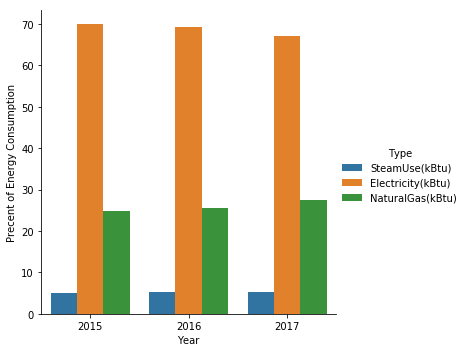

In [116]:
# Creation of plots

g = sns.catplot(data=by_DataYear_reformatted, x='DataYear', y='Energy%', hue='Type', kind='bar')
g.set_xlabels('Year')
g.set_ylabels('Precent of Energy Consumption')
g.savefig('EnergyPercent_vs_Year')

### This section of code is for creating a visualization of the energy consumption based on the age of the building
This needs to be normalized and will be updated in the future

In [118]:
# Condensing and reformating the data for the years the buildings were constructed

by_YearBuilt = data.groupby('YearBuilt').sum()
by_YearBuilt.reset_index(inplace=True)

by_YearBuilt.head()

,YearBuilt,BuildingID,DataYear,ZipCode,PropertyGFATotal,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1900,2564514,296352,14421873,7518014,20028.8,20341,404535430,413905331,15936696,256085778,133718010,9733.62,195.39
1,1901,541335,48384,2354691,1211937,3115.5,3234,53739348,56043807,0,33556549,20183255,1273.74,28.54
2,1902,697809,66528,3237594,1518609,5922.2,6020,104639071,107201833,0,63146982,41492962,2582.80,73.52
3,1903,140106,12096,588624,168600,700.8,721,5867017,6073464,0,4832869,1034209,83.52,2.72
4,1904,515736,84672,4120587,3510204,5041.8,5060,173397857,176587774,6001679,113484307,53900824,3956.25,55.31


In [67]:
# Binning the data into decades

bins = np.arange(1899,2020,10)
decades = ["1900's", "1910's", "1920's", "1930's", "1940's", "1950's", "1960's", "1970's", "1980's", "1990's", "2000's", "2010's"]
by_YearBuilt['DecadeBuilt'] = pd.cut(by_YearBuilt['YearBuilt'], bins, labels=decades)
by_DecadeBuilt = by_YearBuilt.groupby('DecadeBuilt').sum()
by_DecadeBuilt.reset_index(inplace=True)
by_DecadeBuilt

,DecadeBuilt,YearBuilt,BuildingID,DataYear,ZipCode,PropertyGFATotal,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1900's,19045,11066295,1197504,58276590,31831110,72215.4,74058,1613888974,1670269295,68552963,985932527,557696672,40256.02,785.51
1,1910's,19145,10231353,1076544,52392159,34116887,60659.3,62202,1774502343,1828832715,65471285,1177303545,528666413,39633.30,667.27
2,1920's,19245,17149200,1772064,86240127,56721113,114978.3,118728,3872355841,4021591944,535061172,2099116269,1229144207,115072.32,1668.07
3,1930's,15478,3897507,429408,20898819,19097047,21698.1,22574,1046379976,1105128494,100892118,517744533,409968474,31723.05,339.83
4,1940's,17502,5167137,520128,25314420,19250140,34889.4,35753,1210367360,1261956664,48925440,650938470,510512336,34379.24,430.65
5,1950's,19545,11749404,1233792,60049491,39795451,85172.4,87084,2963908497,3035181232,101747842,1717781252,1155150079,78650.41,833.92
6,1960's,19645,26134428,2588544,125987809,82667140,168584.6,173307,4924244079,5078913476,235640256,3045450959,1631604815,121092.68,1483.93
7,1970's,19745,17481222,1802304,87721422,65633164,122820.1,125907,3718694509,3780580715,105926347,3003644186,608091953,57681.74,723.63
8,1980's,19845,24884838,2491776,121273294,127484983,161574.7,165387,6353095689,6397787924,99544296,5462299897,794887601,82025.46,718.61
9,1990's,19945,20907747,2219616,108025222,121905826,158988.5,161699,7016758090,7142595433,525755719,4704944037,1790393544,159537.15,1067.78


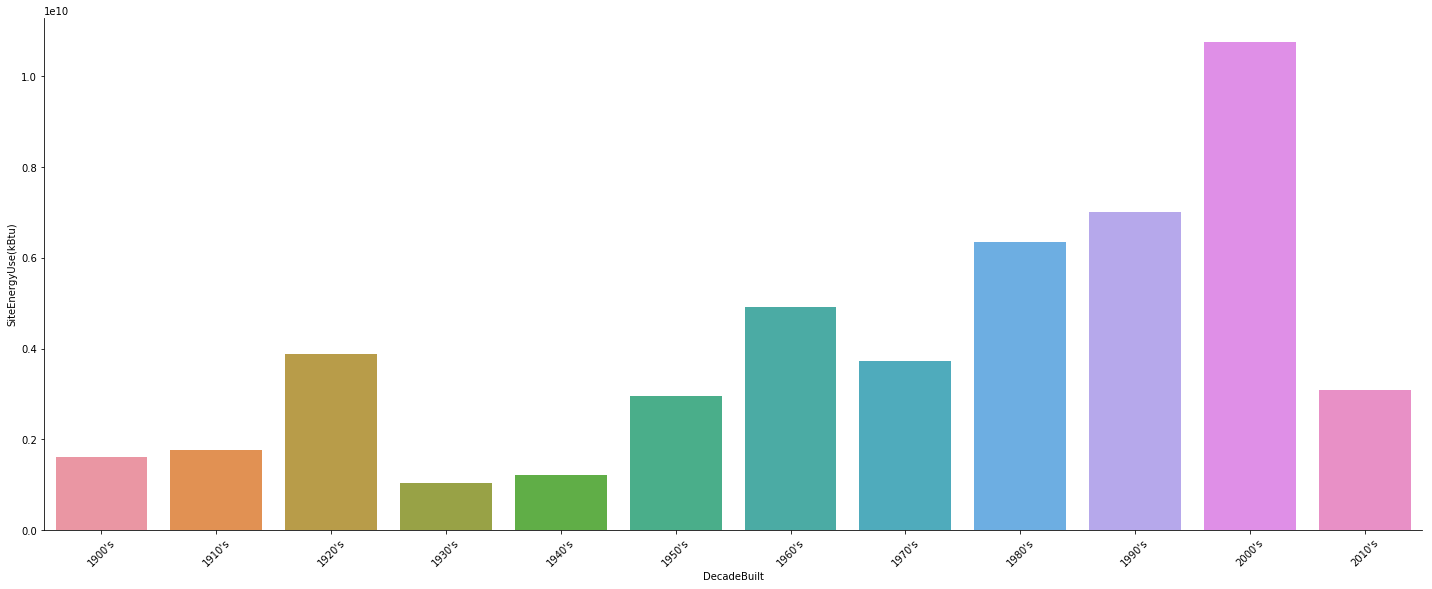

In [96]:
# Plotting the resulting data

g = sns.catplot(data=by_DecadeBuilt, x='DecadeBuilt', y='SiteEnergyUse(kBtu)', kind='bar', height=8, aspect=2.5)
g.set_xticklabels(rotation=45)
g.savefig("SEU_vs_DecadeBuilt.png")

### This section of code is for creating a visualization of the energy consumption based on the primary use of the building

In [46]:
# Condensing and reformating the data for the type of building 

by_PropertyType = data.groupby('PrimaryPropertyType').mean()
by_PropertyType.reset_index(inplace=True)
by_PropertyType.insert(loc=15, column='SiteEnergyperGFA(kBtu/SqrFt)', value = by_PropertyType['SiteEnergyUse(kBtu)'] / by_PropertyType['PropertyGFATotal'])
by_PropertyType.head()

,PrimaryPropertyType,BuildingID,DataYear,ZipCode,YearBuilt,PropertyGFATotal,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SiteEnergyperGFA(kBtu/SqrFt)
0,College/University,21819.636364,2015.000000,98119.500000,1954.500000,246202.590909,140.231818,148.590909,1.630922e+07,1.818174e+07,6.024991e+05,9.440988e+06,6.266124e+06,445.112727,1.512273,66.243082
1,Distribution Center,12792.934641,2016.000000,98124.281046,1962.516340,70437.836601,88.732026,90.137255,2.809552e+06,2.881061e+06,0.000000e+00,2.039735e+06,7.698541e+05,53.501046,0.744183,39.886972
2,High-Rise Multifamily,25858.548173,2015.996678,98110.850498,1980.063123,206546.272425,120.816279,125.614618,9.005002e+06,9.414985e+06,2.766497e+05,5.450356e+06,3.278072e+06,226.412924,1.110100,43.597990
3,Hospital,16731.444444,2016.000000,98117.444444,1977.444444,694872.703704,403.740741,402.296296,1.427507e+08,1.439340e+08,3.457883e+07,6.951259e+07,3.866025e+07,4873.918519,6.322222,205.434357
4,Hotel,6498.261084,2016.004926,98108.522167,1965.527094,166204.192118,174.604433,176.039409,1.328122e+07,1.345824e+07,2.150762e+06,6.720455e+06,4.410094e+06,423.213596,2.563498,79.909057


In [45]:
# Sorting the data to be descending for visualization purposes

by_PropertyType_sorted = by_PropertyType.sort_values('SiteEnergyperGFA(kBtu/SqrFt)', ascending=False)
by_PropertyType_sorted.head()

,PrimaryPropertyType,BuildingID,DataYear,ZipCode,YearBuilt,PropertyGFATotal,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),SiteEnergyperGFA(kBtu/SqrFt)
6,Laboratory,17839.190476,2016.428571,98110.142857,1972.047619,119647.000000,617.061905,615.333333,2.704035e+07,2.716729e+07,3.101456e+06,1.373064e+07,1.020828e+07,819.668571,8.537143,226.001057
24,Supermarket/Grocery Store,22500.527778,2015.000000,98119.694444,1982.833333,46614.583333,612.708333,619.666667,9.857018e+06,1.028078e+07,0.000000e+00,6.414708e+06,3.442576e+06,227.551944,4.749722,211.457816
3,Hospital,16731.444444,2016.000000,98117.444444,1977.444444,694872.703704,403.740741,402.296296,1.427507e+08,1.439340e+08,3.457883e+07,6.951259e+07,3.866025e+07,4873.918519,6.322222,205.434357
17,Restaurant,23013.034483,2016.034483,98108.241379,1933.068966,32184.689655,324.279310,327.344828,5.460421e+06,5.569918e+06,1.990249e+05,1.949839e+06,3.332881e+06,201.399310,6.256207,169.658958
23,Supermarket / Grocery Store,20311.700000,2016.500000,98120.075000,1983.475000,59442.825000,556.577500,558.687500,1.006415e+07,1.017246e+07,0.000000e+00,6.438100e+06,3.469482e+06,220.024000,4.927875,169.308017


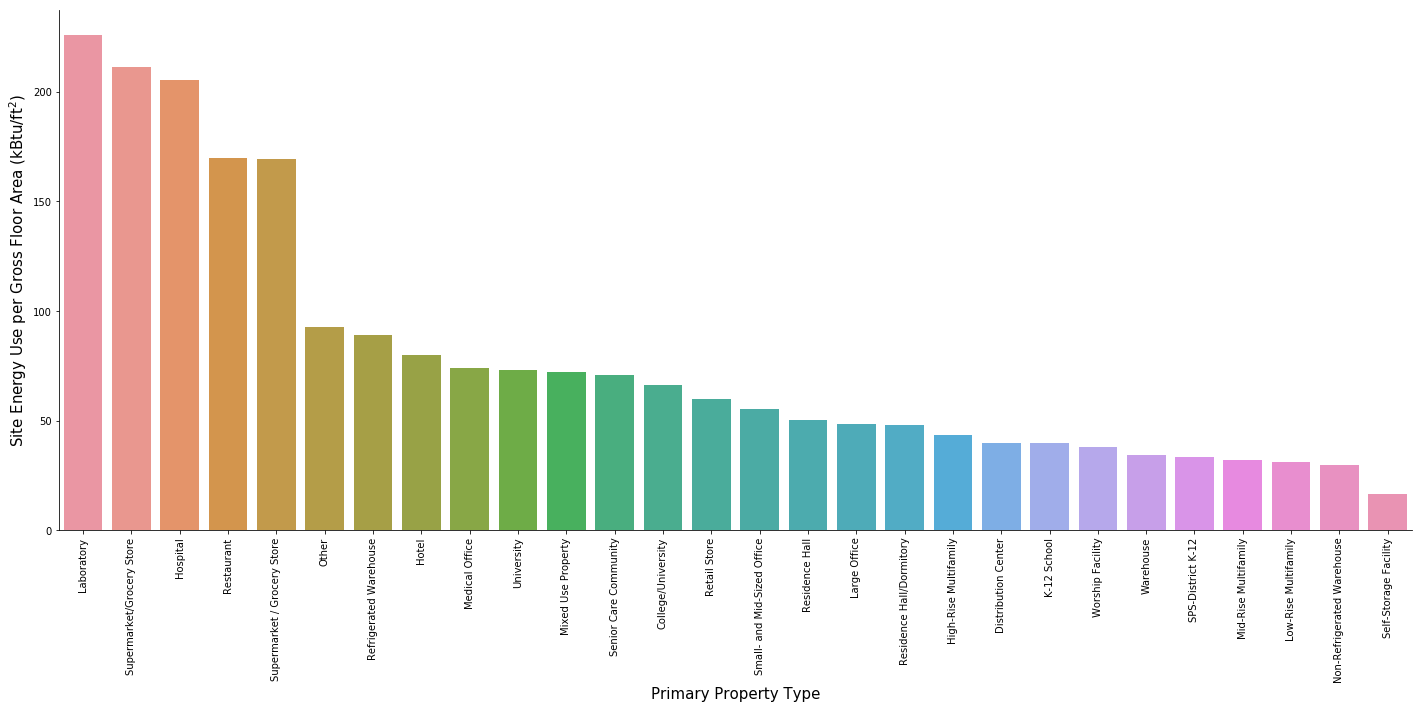

In [95]:
# Plotting the data

g = sns.catplot(data=by_PropertyType_sorted, x='PrimaryPropertyType', y='SiteEnergyperGFA(kBtu/SqrFt)', kind='bar', height=8, aspect=2.5)
g.set_xticklabels(rotation=90)
g.set_xlabels('Primary Property Type', size=15)
g.set_ylabels('Site Energy Use per Gross Floor Area (kBtu/ft$^2$)', size=15)

g.savefig("SEUperGFA_VS_PropertyType.png")

### This section of code is for creating a visualization of the energy consumption vs utility rate
Code not finished. To be continued

In [120]:
# Condensing and reformating the data for each zip code

by_ZipCode = data.groupby('ZipCode').mean()
by_ZipCode.reset_index(inplace=True)
by_ZipCode.head()

,ZipCode,BuildingID,DataYear,YearBuilt,PropertyGFATotal,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,98006,712.0,2016.0,1918.0,108245.0,146.866667,148.000000,4.810157e+06,4.842386e+06,328325.0,4.481897e+06,0.000000e+00,49.120000,0.390000
1,98011,23368.0,2016.0,1909.0,111137.0,205.900000,204.666667,9.804839e+06,9.859848e+06,0.0,4.831457e+06,4.973451e+06,293.216667,2.573333
2,98012,19669.0,2016.0,1910.0,40489.0,69.600000,70.000000,1.841218e+06,1.854660e+06,0.0,4.228743e+05,1.418350e+06,77.863333,1.910000
3,98013,34719.5,2016.0,1964.5,40823.5,737.366667,739.166667,1.531136e+07,1.538181e+07,0.0,1.066692e+07,4.644585e+06,311.700000,6.075000
4,98014,23289.0,2017.0,1929.0,25380.0,107.400000,106.000000,2.173346e+06,2.137608e+06,0.0,2.119630e+05,1.961383e+06,105.050000,4.140000


In [121]:
# Finding which zip codes exist in the dataset

Seattle_ZipCodes = by_ZipCode['ZipCode'].unique()
Seattle_ZipCodes

array([98006, 98011, 98012, 98013, 98014, 98020, 98028, 98033, 98040,
       98053, 98070, 98101, 98102, 98103, 98104, 98105, 98106, 98107,
       98108, 98109, 98110, 98111, 98112, 98113, 98115, 98116, 98117,
       98118, 98119, 98121, 98122, 98124, 98125, 98126, 98127, 98133,
       98134, 98136, 98144, 98145, 98146, 98154, 98155, 98164, 98165,
       98168, 98177, 98178, 98181, 98191, 98198, 98199, 98204, 98272],
      dtype=int64)

In [72]:
# Importing utility rate data sets

utility_rates_iou = pd.read_csv('iouzipcodesall.csv')
utility_rates_noniou = pd.read_csv('noniouzipcodesall.csv')

In [123]:
# Filtering out the zip codes in Seattle from one of the utility rate datasets

Seattle_utility_rates_iou = utility_rates_iou[utility_rates_iou['zip'] == Seattle_ZipCodes[0]]

for i in range(len(Seattle_ZipCodes)-1):
    Seattle_utility_rates_iou = pd.concat([Seattle_utility_rates_iou, utility_rates_iou[utility_rates_iou['zip'] == Seattle_ZipCodes[i+1]]])
    
Seattle_utility_rates_iou

,year,zip,eiaid,utility_name,state,service_type,ownership,commercial_rate,industrial_rate,residential_rate
39906,2015,98006,15500,Puget Sound Energy Inc,WA,Bundled,Investor Owned,0.097690,0.090800,0.104392
40156,2015,98006,15500,Puget Sound Energy Inc,WA,Delivery,Investor Owned,0.007897,0.004898,0.000000
92351,2016,98006,15500,Puget Sound Energy Inc,WA,Bundled,Investor Owned,0.099314,0.092763,0.111160
92601,2016,98006,15500,Puget Sound Energy Inc,WA,Delivery,Investor Owned,0.008437,0.005151,0.000000
144843,2017,98006,15500,Puget Sound Energy Inc,WA,Bundled,Investor Owned,0.099435,0.092867,0.112704
145093,2017,98006,15500,Puget Sound Energy Inc,WA,Delivery,Investor Owned,0.009701,0.006213,0.000000
39993,2015,98011,15500,Puget Sound Energy Inc,WA,Bundled,Investor Owned,0.097690,0.090800,0.104392
40243,2015,98011,15500,Puget Sound Energy Inc,WA,Delivery,Investor Owned,0.007897,0.004898,0.000000
92438,2016,98011,15500,Puget Sound Energy Inc,WA,Bundled,Investor Owned,0.099314,0.092763,0.111160
92688,2016,98011,15500,Puget Sound Energy Inc,WA,Delivery,Investor Owned,0.008437,0.005151,0.000000
